In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## 1. check that the gene names match

To do this, I will read in Moriarty's data and Adler's data each as a pandas dataframe. To check whether the gene names match across the two datasets, I will first check each dataset for any duplicate gene names. Spoiler: there were none. So, I then checked to see if the sets of gene names were the same across both datasets without consideration for their order. Spoiler, they were not!

Since we know that Moriarty's data is the one that is corrupted and that Adler's is pristine, I used list comprehension to identify the gene names that were present in Moriarty's data but not Adler's. I found that Moriarty must have used Microsoft Excel at some point to read is file, which corrupted a few gene names and automatically turned them into dates! So, I replaced these corrupted gene names with their correct names. You're welcome, Moriarty!

In [2]:
# read in the data from Moriarty and Adler's files into pandas dataframes.
# a quick look at the file shows a few comment lines at the top that we need to ignore.
moriarty_data = pd.read_csv('Moriarty_SuppTable1.tsv', sep='\t', comment = '#')
adler_data = pd.read_csv('Adler_SuppTable2.tsv', sep='\t', comment = '#')

# we will make arrays of gene names for each of their datasets using pd.Series
moriarty_genes = pd.Series(moriarty_data['gene'])
adler_genes = pd.Series(adler_data['gene'])

Sets are a really efficient way to compare list elements (much more efficient than lists or arrays). If we can confirm that all gene names are unique, we will use Sets to perform the rest of the data cleaning.

In [3]:
# we will convert the arrays to sets for easy comparison of the two gene lists
moriarty_genes_set = set(moriarty_genes)
adler_genes_set = set(adler_genes)

# sets automatically gets rid of any duplicate items, so we need to check if any duplicates were
# removed. if they were, that's a problem. to do this, we'll check the length of the sets and compare
# that with the length of the original array.
if len(moriarty_genes) == len(moriarty_genes_set):
    print('There are no duplicates in Moriarty\'s gene list.')
if len(adler_genes) == len(adler_genes_set):
    print('There are no duplicates in Adler\'s gene list.')

There are no duplicates in Moriarty's gene list.
There are no duplicates in Adler's gene list.


Given that there are no duplicate gene names in anyone's data, we can proceed with finding the genes in Moriarty's gene list that are not present in Adler's gene list.

In [4]:
# get a list of all genes in moriarty's data that are not in adler's data
difference = [item for item in moriarty_genes_set if item not in adler_genes_set]
print('The following genes are present in Moriarty\'s gene list but not Adler\'s and are thus corrupted:')
print(difference)

The following genes are present in Moriarty's gene list but not Adler's and are thus corrupted:
['2-Mar', '1-Oct', '1-Mar', '2-Oct', '1-Sep', '2-Sep', '1-Dec']


Moriarty must have used Microsoft Excel to analyze his RNA-seq data, which automatically reformats gene names that look like dates into date form. Seems like Moriarty fell victim to the Excel trap, but it's okay because he has many buddies authoring 1/5 of all academic papers in top journals who he can complain to. Let's first confirm the correct formatting these corrupted genes:

In [5]:
# ensure that the following are the correct formats of the genes
print('Below, we check whether the correct gene names are included in Adler\'s gene list')
print('mar2:', 'mar2' in adler_genes_set)
print('sep1:', 'sep1' in adler_genes_set)
print('sep2:', 'sep2' in adler_genes_set)
print('oct2:', 'oct2' in adler_genes_set)
print('mar1:', 'mar1' in adler_genes_set)
print('oct1:', 'oct1' in adler_genes_set)

Below, we check whether the correct gene names are included in Adler's gene list
mar2: True
sep1: True
sep2: True
oct2: True
mar1: True
oct1: True


Now that we know the correctly formatted gene names, we can replace the corrupted gene names with the correct gene names. The dict data type comes in very handy for this.

In [6]:
# replace corrupted genes in moriarty's data
# make a dict with the correct corresponding genes
fix_corruption = { '2-Mar':'mar2', '1-Sep':'sep1', '2-Sep':'sep2', '2-Oct':'oct2',
                  '1-Mar':'mar1', '1-Dec':'dec1', '1-Oct':'oct1'}

# locate the corrupted genes in Moriarty's original dataset, then replace with the "value" associated
# with the corrupted gene name "key"
for i in range(len(moriarty_genes_set)):
    if moriarty_data.loc[i, 'gene'] in fix_corruption.keys():
        corrupted_key = moriarty_data.loc[i, 'gene']
        moriarty_data.loc[i, 'gene'] = fix_corruption[corrupted_key]

# check to see if the gene lists are the same now
new_moriarty_genes_set = set(pd.Series(moriarty_data['gene']))
if new_moriarty_genes_set == adler_genes_set:
    print('Moriarty\'s gene names have been fixed. The two gene lists are identical.')

moriarty_data

Moriarty's gene names have been fixed. The two gene lists are identical.


gene   class      0m      3m     6m     9m    12m    15m    18m    21m  \
0     fcnZ   early    5.00    3.00   0.00   0.00   0.00   0.00   0.00   0.00   
1     mnsN   early   12.00    5.00   1.00   0.00   0.00   0.00   0.00   0.00   
2     eqoN  middle   65.01   68.97  60.96  40.95  22.95  16.98   8.98  10.98   
3     gupU   early   65.01   31.98  35.97  25.97  22.95   8.99  12.97   6.99   
4     wccP   early   68.01   50.98  38.97  21.97  18.96   7.99   3.99   5.99   
...    ...     ...     ...     ...    ...    ...    ...    ...    ...    ...   
4395  hepQ   early    0.00    0.00   0.00   0.00   0.00   0.00   0.00   0.00   
4396  nuzM   early  244.04  153.93  91.93  52.94  34.92  13.99   9.98   3.99   
4397  dhgR   early   17.00   14.99  12.99   5.99   9.98   2.00   2.00   3.00   
4398  wdkS   early    0.00    0.00   0.00   0.00   0.00   0.00   0.00   0.00   
4399  nnaN   early   73.01    5.00   2.00   0.00   0.00   0.00   0.00   0.00   

        24m  27m  30m  
0      0.00  0.0  0.0  
1      0.00  0.0  0.0  
2     10.99  3.0  1.0  
3      3.00  2.0  1.0  
4      0.00  1.0  2.0  
...     ...  ...  ...  
4395   0.00  0.0  0.0  
4396   7.00  2.0  2.0  
4397   0.00  0.0  0.0  
4398   0.00  0.0  0.0  
4399   0.00  0.0  0.0  

[4400 rows x 13 columns]

## 2. tidy the data

First, we will fix up Moriarty's blasphemous column names by removing the m at the end of each column name and casting the remaining string as an integer. Then, I will use pd.melt to turn the wide form data into long form. 

In [7]:
# first, let's print the column names
print('Moriarty\'s old column names:')
print(moriarty_data.columns)
print('\n')

# rename the columns of Moriarty's data so that they become integers
# make a new list of column names and change the elements of this list
new_colnames = list(moriarty_data.columns)

for i in range(2,len(new_colnames)): # iterate through all col names indicating time
    mins = new_colnames[i]
    if mins[-1] == 'm':
        mins = mins[:-1] # get rid of the 'm' character at the end of each time
        mins = int(mins) # cast as an int
        new_colnames[i] = mins # replace element in new_colnames list

# set new column names
moriarty_data.columns = new_colnames

# print the new and improved column names
print('Moriarty\'s new column names (you\'re welcome!):')
print(moriarty_data.columns)

Moriarty's old column names:
Index(['gene', 'class', '0m', '3m', '6m', '9m', '12m', '15m', '18m', '21m',
       '24m', '27m', '30m'],
      dtype='object')


Moriarty's new column names (you're welcome!):
Index(['gene', 'class', 0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30], dtype='object')


In [8]:
# melt the data
# IDs will be gene and class; variables will be all of the TPMs associated with each of the time columns
wide_moriarty_data = moriarty_data # specify that our current data is in the wide format

# to melt the data, we specify that we want to keep the gene names 
long_moriarty_data = pd.melt(moriarty_data, id_vars = list(moriarty_data.columns)[:2],
        value_vars = list(moriarty_data.columns)[2:13],
        var_name='time', value_name='tpm')

# set gene names as the index
long_moriarty_data.set_index('gene', inplace=True)

print('Moriarty\'s data in long form')
long_moriarty_data

Moriarty's data in long form


class time    tpm
gene                    
fcnZ   early    0   5.00
mnsN   early    0  12.00
eqoN  middle    0  65.01
gupU   early    0  65.01
wccP   early    0  68.01
...      ...  ...    ...
hepQ   early   30   0.00
nuzM   early   30   2.00
dhgR   early   30   0.00
wdkS   early   30   0.00
nnaN   early   30   0.00

[48400 rows x 3 columns]

## 3. explore the data

For each of these explorations, the general workflow is to first determine whether I should work with the wide form or long form, then sort the data and subset the top 5. To output the five genes with the highest mRNA synthesis rate and the longest mRNA halflife, it is easiest to work with the wide format, since each gene's associated synthesis rate and halflife are easily accessible via Adler's wide form data. 

To dtermine the five genes with the highest ratio of expression at t=30 vs. t=0, I also used the wide form, as these values are gene-specific. I created a new column "t30/t10 ratio" where I divided the values in the "30" column by the values in the "10" column, then sorted by this column and selected the top 5.

In [9]:
# five genes with highest mRNA synthesis rate
# sort the gene names by synthesis rate and take the top 5 entries
adler_data_sorted = adler_data.sort_values(by='synthesis_rate', ascending=False)
print('top 5 genes with fastest synthesis rate:')

# subset the top 5 rows and print the gene and synthesis rate
adler_data_sorted[['gene', 'synthesis_rate']][0:5]

top 5 genes with fastest synthesis rate:


gene  synthesis_rate
2664  uzdZ           15.96
823   mkqZ           15.39
2184  pfhT           14.67
4131  coxU           13.28
1091  wduX           12.02

In [10]:
# five genes with longest mRNA halflife
adler_data_sorted = adler_data.sort_values(by='halflife', ascending=False)
print('top 5 genes with longest halflife:')

# subset the top 5 rows and print the gene and halflife
adler_data_sorted[['gene', 'halflife']][0:5]

top 5 genes with longest halflife:


gene  halflife
397   qonD    114.98
1079  cxyH     63.57
967   znkB     57.79
2063  qyfB     52.48
924   qunV     42.06

In [11]:
# five genes with highest ratio of expression at t=30 vs t=0
# make a new col with 30 min / 0 min expression ratio

# seems like this is much easily done with wide form data, so i will go back to wide form :)
# need to take care of indeterminant cases where t0 = 0
wide_moriarty_data['t30/t0 ratio'] = np.where(
    # if the value at 0 is not zero,
    wide_moriarty_data[0] != 0,

    # calculate the t30/t0 ratio
    wide_moriarty_data[30] / wide_moriarty_data[0],

    # otherwise, set this value to NaN
    np.nan
)

print('top 5 genes with highest ratio of t30/t0 expression ratio:')
# sort by the t30/t0 ratio column
moriarty_data_sorted = wide_moriarty_data.sort_values(by='t30/t0 ratio', ascending=False)

# subset the top 5 rows and print the gene and t30/t0 ratio
moriarty_data_sorted[['gene','t30/t0 ratio']][0:5]

top 5 genes with highest ratio of t30/t0 expression ratio:


gene  t30/t0 ratio
2604  qonD      8.000518
1158  znkB      7.605204
4006  cxyH      7.284318
2694  qyfB      6.612169
1278  nwoU      6.569576

## 4. merge the data

In [12]:
# using 'gene' as the reference, merge the two datasets
merged_data = pd.merge(wide_moriarty_data, adler_data, on='gene')

merged_data

gene   class       0       3      6      9     12     15     18     21  \
0     fcnZ   early    5.00    3.00   0.00   0.00   0.00   0.00   0.00   0.00   
1     mnsN   early   12.00    5.00   1.00   0.00   0.00   0.00   0.00   0.00   
2     eqoN  middle   65.01   68.97  60.96  40.95  22.95  16.98   8.98  10.98   
3     gupU   early   65.01   31.98  35.97  25.97  22.95   8.99  12.97   6.99   
4     wccP   early   68.01   50.98  38.97  21.97  18.96   7.99   3.99   5.99   
...    ...     ...     ...     ...    ...    ...    ...    ...    ...    ...   
4395  hepQ   early    0.00    0.00   0.00   0.00   0.00   0.00   0.00   0.00   
4396  nuzM   early  244.04  153.93  91.93  52.94  34.92  13.99   9.98   3.99   
4397  dhgR   early   17.00   14.99  12.99   5.99   9.98   2.00   2.00   3.00   
4398  wdkS   early    0.00    0.00   0.00   0.00   0.00   0.00   0.00   0.00   
4399  nnaN   early   73.01    5.00   2.00   0.00   0.00   0.00   0.00   0.00   

         24   27   30  t30/t0 ratio  synthesis_rate  halflife  
0      0.00  0.0  0.0      0.000000            0.03      1.28  
1      0.00  0.0  0.0      0.000000            0.04      1.71  
2     10.99  3.0  1.0      0.015382            0.12      3.73  
3      3.00  2.0  1.0      0.015382            0.08      3.71  
4      0.00  1.0  2.0      0.029407            0.13      3.02  
...     ...  ...  ...           ...             ...       ...  
4395   0.00  0.0  0.0           NaN            0.00      1.06  
4396   7.00  2.0  2.0      0.008195            0.57      2.56  
4397   0.00  0.0  0.0      0.000000            0.03      3.60  
4398   0.00  0.0  0.0           NaN            0.01      0.99  
4399   0.00  0.0  0.0      0.000000            0.54      0.76  

[4400 rows x 16 columns]

## 5. figure out the explanation

From the last part of question 3, it seems like many of the top halflife genes overlap with the t30/t0 ratio. I want to investigate if this pattern holds for the entire dataset, so I will make a scatterplot of halflife and the t30/t0 ratio using the merged dataset.

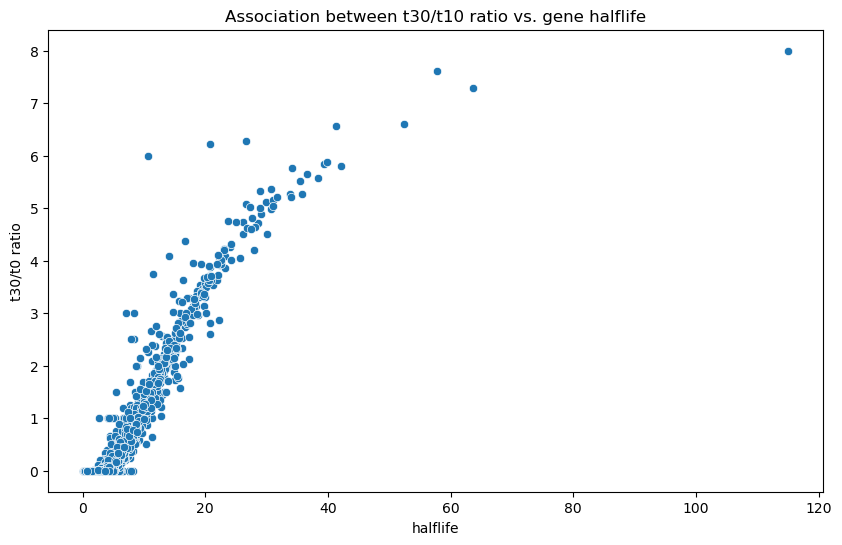

In [13]:
# using the merged dataset from above, i will plot a scatterplot with halflife on the x-axis,
# t30/t0 ratio on the y-axis to see if there's a relationship between the two
fig, axs = plt.subplots(figsize=(10,6))
sns.scatterplot(data=merged_data, x='halflife', y='t30/t0 ratio', )
plt.title('Association between t30/t10 ratio vs. gene halflife')
plt.show()

Interesting. There's definitely a positive association between the halflife of the gene and the t30/t0 ratio. Genes with a greater halflife tend to have a greater t30/t0 ratio. This makes sense, as the genes that decay the slowest (longest halflife) also have the greatest residual "concentration" from 0 minutes to 30 minutes. I wonder if the strange trend we see relates to differential rate of decay between different gene types.

I want to attempt to recreate Moriarty's trends using Adler's data. Given the halflife, I can determine the rate of decay, and given the starting gene concentrations, I can determine the gene concentrations over time using a Poisson model. This will serve as our positive control data, as we know that the gene concentrations will decay over time. Using this data, I want to see when and how the discrepancy in gene concentrations between early, middle, and late genes occurs.

I will start by plotting 3 genes from Moriarty's data (one early, one middle, and one late) to replicate the trends seen in the pset.

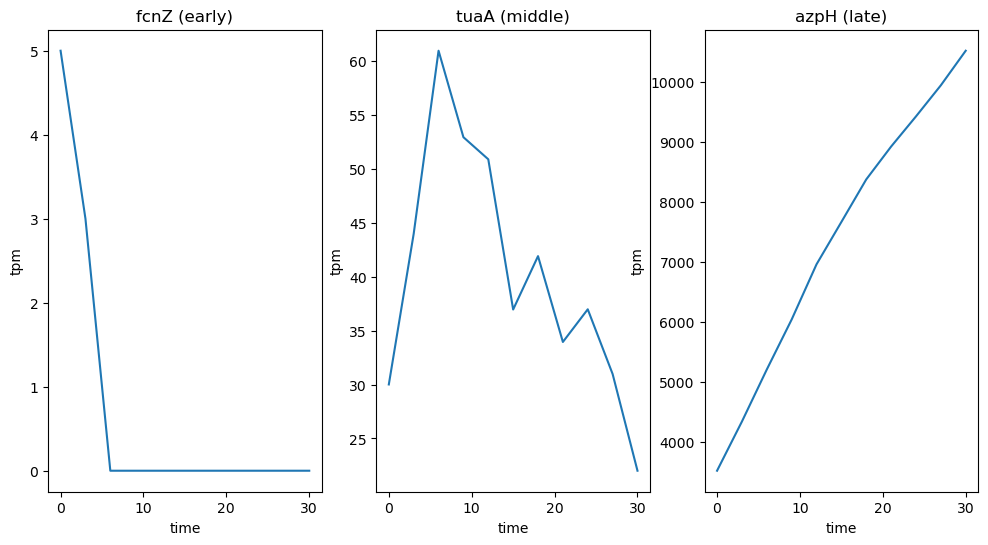

In [14]:
# get a list of the early, middle, and late genes in Moriarty's data and pick one of each
long_early_rows = long_moriarty_data[long_moriarty_data['class'] == 'early']
long_middle_rows = long_moriarty_data[long_moriarty_data['class'] == 'middle']
long_late_rows = long_moriarty_data[long_moriarty_data['class'] == 'late']

# pick one early, middle, and late gene. i chose fcnZ for early, tuaA for middle, and azpH for late.
# plot their tpm values over time using a line graph
# first, plot fcnZ (early)
fig, axs = plt.subplots(1,3,figsize=(12,6))
fcnZ = long_early_rows.loc['fcnZ']
sns.lineplot(data=fcnZ, x='time', y='tpm', ax=axs[0])
axs[0].set_title('fcnZ (early)')

# next, plot tuaA (middle)
tuaA = long_middle_rows.loc['tuaA']
sns.lineplot(data=tuaA, x='time', y='tpm', ax=axs[1])
axs[1].set_title('tuaA (middle)')

# finally, plot azpH (late)
azpH = long_late_rows.loc['azpH']
sns.lineplot(data=azpH, x='time', y='tpm', ax=axs[2])
axs[2].set_title('azpH (late)')

plt.show()

Seems like these genes follow a similar pattern as the early, middle, and late genes shown in the pset, with fcnZ decreasing really quickly, tuaA increasing then decreasing, and azpH seemingly increasing over time. Since we know that the increasing trend cannot actually be reality, I will try to simulate this data using Adler's halflife data to generate a positive control.

To get the rate of decay (k2), we know that $t_{1/2} = \frac{\ln{2}}{k_2} \implies k_2 = \frac{\ln{2}}{t_{1/2}}$. Then, fitting a Poisson distribution, we know that the concentration of each gene at time $t$ follows $x(t) = x(0)\cdot e^{-k_2t}$. I will generate the counts data at each time point, remember to convert between seconds and minutes.

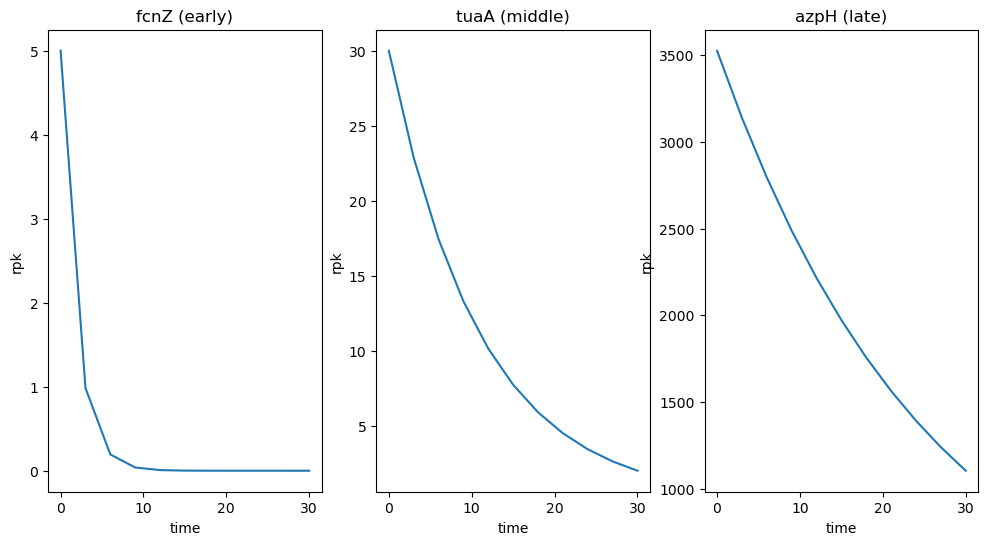

In [16]:
# simulate the decay using the degradation rate derived from the halflife
simulated_decay = merged_data.copy()

# determine the k2 value from the halflife using the equation above, making sure to convert halflife to seconds
simulated_decay['k2'] = np.log(2) / (simulated_decay['halflife']*60)

# change the column name of 'tpm' to 'rpk' since this data is not normalized
simulated_decay.rename(columns={'tpm':'rpk'}, inplace=True)

# simulate the data for each of the timepoints (0 min, 3 min, ..., 30 min)
for i in range(11): # 11 time values
    minutes = i*3
    seconds = minutes * 60
    # use the equation above to get the simulated data at each time point
    simulated_decay[minutes] = simulated_decay[0] * np.exp(-1*simulated_decay['k2']*seconds)

# melt to long form for easy plotting. keep the gene name and class as columns and melt the RPK
# values (columns 2:13) for all of the times
long_simulated_decay = pd.melt(simulated_decay, id_vars = list(simulated_decay.columns)[:2],
        value_vars = list(simulated_decay.columns)[2:13],
        var_name='time', value_name='rpk')

# plot the RPKs for the same three genes: fcnZ (early), tuaA (middle), and azpH (late)
fig, axs = plt.subplots(1,3,figsize=(12,6))
fcnZ = long_simulated_decay[long_simulated_decay['gene'] == 'fcnZ']
sns.lineplot(data=fcnZ, x='time', y='rpk', ax=axs[0])
axs[0].set_title('fcnZ (early)')

tuaA = long_simulated_decay[long_simulated_decay['gene'] == 'tuaA']
sns.lineplot(data=tuaA, x='time', y='rpk', ax=axs[1])
axs[1].set_title('tuaA (middle)')

azpH = long_simulated_decay[long_simulated_decay['gene'] == 'azpH']
sns.lineplot(data=azpH, x='time', y='rpk', ax=axs[2])
axs[2].set_title('azpH (late)')

plt.show()

It seems like early genes decay very fast and late genes decay very slow, with middle genes being somewhere in between. The unnormalized RPKs of these genes are still all decreasing, but given the differences in rate of decay, it seems as if those that decay slower are actually increasing in concentration compared to those that decay faster. 

So, I suspect that it's the TPM normalization process that's causing the faux increase for middle and late genes in Moriarty's dataset. Because TPMs are normalized and relative to one another, it is likely that this process makes the genes that are decreasing slower look like they are increasing in comparison to those that are decreasing faster. 

I want to try to replicate the TPM data in Moriarty's dataset. To do so, I have to normalize the RPK values by dividing the values in each time point by the sum of the values across all of the genes, then multiply by $10^6$, to generate the TPM. Then, I want to plot these new normalized values to see if the trend persists.

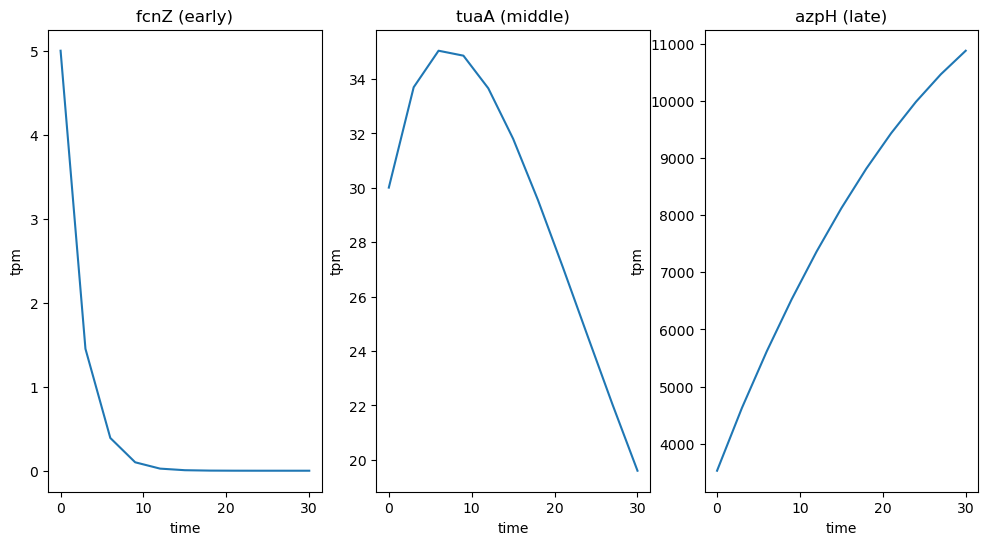

In [17]:
# to convert RPK to TPM, divide each RPK value by the sum of the RPK across all genes
norm_simulated_decay = simulated_decay.copy()

# rename 'rpk' column to 'tpm' since we are generating normalized TPM values
norm_simulated_decay.rename(columns={'rpk':'tpm'}, inplace=True)

# iterate through data for each time point (0 min, 3 min, ..., 30 min)
for i in range(11): # there are 11 time values
    minutes = i*3
    # divide each RPK value by the column sum (sum across all genes)
    norm_simulated_decay[minutes] = norm_simulated_decay[minutes] / sum(norm_simulated_decay[minutes]) * 10**6

# melt to long form for plotting. keep the gene name and class as columns and melt the RPK
# values (columns 2:13) for all of the times
norm_long_simulated_decay = pd.melt(norm_simulated_decay, id_vars = list(norm_simulated_decay.columns)[:2],
        value_vars = list(norm_simulated_decay.columns)[2:13],
        var_name='time', value_name='tpm')

# plot the normalized TPM values for the same three genes: fcnZ (early), tuaA (middle), and azpH (late)
fig, axs = plt.subplots(1,3,figsize=(12,6))
fcnZ = norm_long_simulated_decay[norm_long_simulated_decay['gene'] == 'fcnZ']
sns.lineplot(data=fcnZ, x='time', y='tpm', ax=axs[0])
axs[0].set_title('fcnZ (early)')

tuaA = norm_long_simulated_decay[norm_long_simulated_decay['gene'] == 'tuaA']
sns.lineplot(data=tuaA, x='time', y='tpm', ax=axs[1])
axs[1].set_title('tuaA (middle)')

azpH = norm_long_simulated_decay[norm_long_simulated_decay['gene'] == 'azpH']
sns.lineplot(data=azpH, x='time', y='tpm', ax=axs[2])
axs[2].set_title('azpH (late)')

plt.show()

It seems like our hypothesis is correct; once we normalize, the early/middle/late trend occurs again where some genes look like they are increasing in concentration. Because some genes decay faster than others, it seems like the slower decaying genes are actually rising. This isn't actually true, since all of the TPM data is relative.

Now, since we took only one gene from each gene category, there is a small but nonzero chance that these results are specific to the genes that we chose. So, let's go ahead and plot Moriarty's data for all of the early, middle, and late genes as well as our simulated RPK values and normalized TPM values for all of the early, middle, and late genes. If the trend persists for every data point, then we can be satisfied with our explanation.

To do this, I will make a lineplot for the average TPM values for each of the categories (early, middle, and late), for each of the datasets that I mentioned above. Jenya showed me this really cool plot type that I can use: https://seaborn.pydata.org/examples/errorband_lineplots.html.

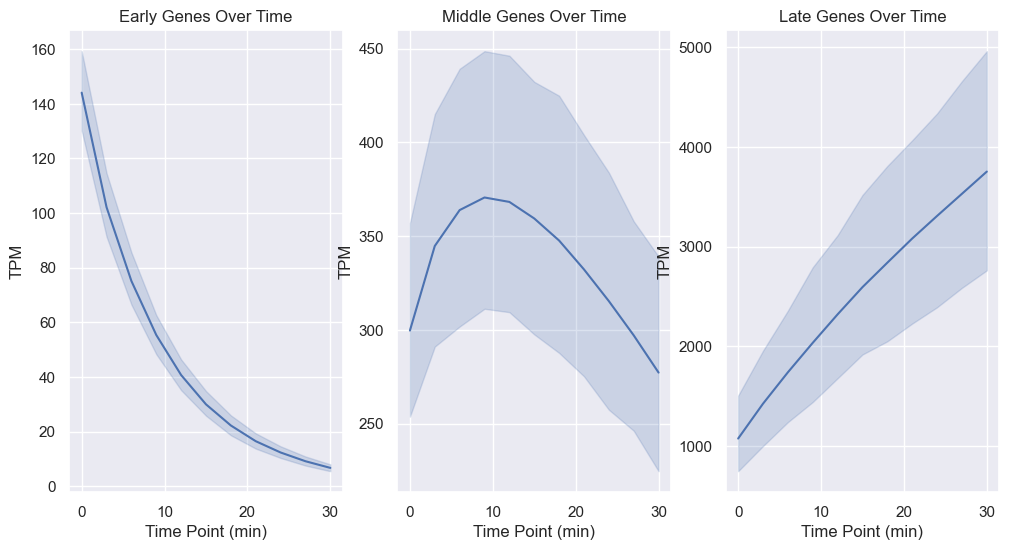

In [24]:
# first, i will plot Moriarty's data. i will plot the average TPMs for all genes in each specified
# category. this particular plot type also shows the error bands, which is great.
# set up my figure with 3 subplots
fig, axs = plt.subplots(1,3,figsize=(12,6))

# we should use the long form for easy plotting
sns.set_theme(style='darkgrid')
sns.lineplot(data=long_early_rows, x='time', y='tpm', ax=axs[0], legend=False)
axs[0].set_title('Early Genes Over Time')
axs[0].set_xlabel('Time Point (min)')
axs[0].set_ylabel('TPM')

# now do the same for all of the middle genes
sns.lineplot(data=long_middle_rows, x='time', y='tpm', ax=axs[1], legend=False)
axs[1].set_title('Middle Genes Over Time')
axs[1].set_xlabel('Time Point (min)')
axs[1].set_ylabel('TPM')

# now do the same for all of the late genes
sns.lineplot(data=long_late_rows, x='time', y='tpm', ax=axs[2], legend=False)
axs[2].set_title('Late Genes Over Time')
axs[2].set_xlabel('Time Point (min)')
axs[2].set_ylabel('TPM')

plt.show()

As we expect, we see the correct early, middle, and late gene trends. Unfortunately, it's a bit hard to tell with some of the genes in the bottom, but you can see the general trend. Now, let's plot the simulated unnormalized RPK values as a sanity check to make sure that everything is decreasing:

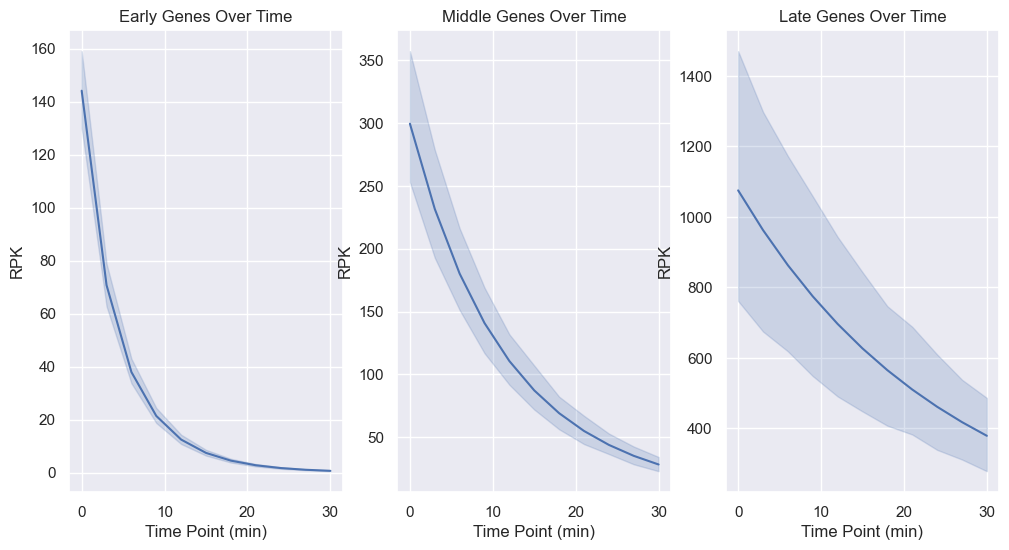

In [27]:
# plot the unnormalized RPK values
# set up my figure with 3 subplots
fig, axs = plt.subplots(1,3,figsize=(12,6))

# we should use the long form for easy plotting
sns.set_theme(style='darkgrid')
sns.lineplot(data=long_simulated_decay[long_simulated_decay['class']=='early'], x='time', y='rpk', ax=axs[0], legend=False)
axs[0].set_title('Early Genes Over Time')
axs[0].set_xlabel('Time Point (min)')
axs[0].set_ylabel('RPK')

# now do the same for all of the middle genes
sns.lineplot(data=long_simulated_decay[long_simulated_decay['class']=='middle'], x='time', y='rpk', ax=axs[1], legend=False)
axs[1].set_title('Middle Genes Over Time')
axs[1].set_xlabel('Time Point (min)')
axs[1].set_ylabel('RPK')

# now do the same for all of the late genes
sns.lineplot(data=long_simulated_decay[long_simulated_decay['class']=='late'], x='time', y='rpk', ax=axs[2], legend=False)
axs[2].set_title('Late Genes Over Time')
axs[2].set_xlabel('Time Point (min)')
axs[2].set_ylabel('RPK')

plt.show()

As expected, all genes are decreasing, albeit at different rates. Now, let's plot the simulated normalized TPM values derived from the simulated unnormalized RPK values.

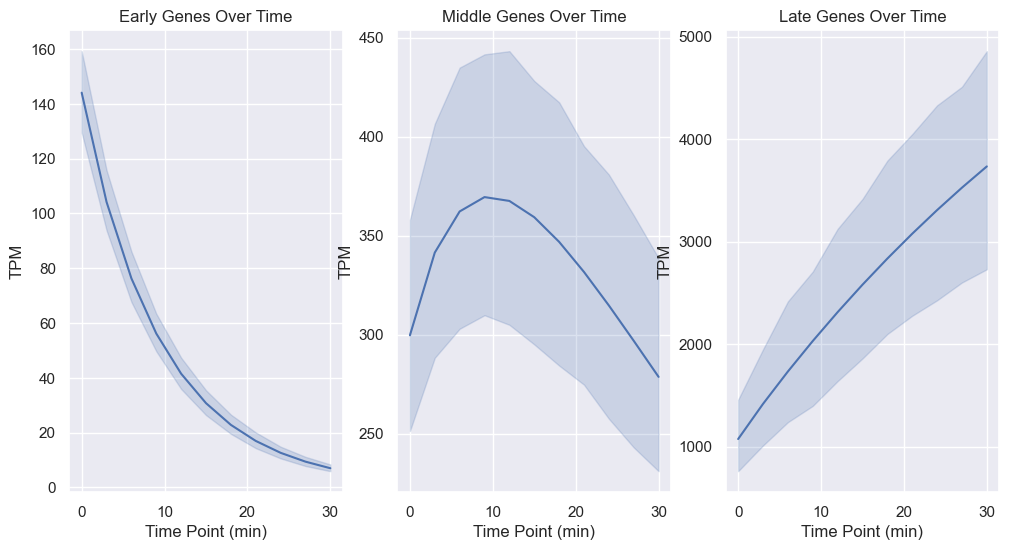

In [28]:
# plot the simulated normalized TPM values derived from the RPK values
# set up my figure with 3 subplots
fig, axs = plt.subplots(1,3,figsize=(12,6))

# we should use the long form for easy plotting
sns.set_theme(style='darkgrid')
sns.lineplot(data=norm_long_simulated_decay[norm_long_simulated_decay['class']=='early'], x='time', y='tpm', ax=axs[0], legend=False)
axs[0].set_title('Early Genes Over Time')
axs[0].set_xlabel('Time Point (min)')
axs[0].set_ylabel('TPM')

# now do the same for all of the middle genes
sns.lineplot(data=norm_long_simulated_decay[norm_long_simulated_decay['class']=='middle'], x='time', y='tpm', ax=axs[1], legend=False)
axs[1].set_title('Middle Genes Over Time')
axs[1].set_xlabel('Time Point (min)')
axs[1].set_ylabel('TPM')

# now do the same for all of the late genes
sns.lineplot(data=norm_long_simulated_decay[norm_long_simulated_decay['class']=='late'], x='time', y='tpm', ax=axs[2], legend=False)
axs[2].set_title('Late Genes Over Time')
axs[2].set_xlabel('Time Point (min)')
axs[2].set_ylabel('TPM')

plt.show()

To summarize, the artifactual increase in TPM after polymerase degradation is due to the nature of TPM as a relative measure of a gene's "concentration" compared to all other genes. As a result, genes that degrade really quickly become early genes, so their "concentrations" reach zero very quickly. On the other hand, late genes degrade very slowly. So, over time, their concentrations still remain much higher than early genes. Since the TPM values of late genes are generated from a comparison with the "concentrations" of other genes, including early genes that have already degraded, it seems as if the late genes continue to rise.

Consider the RPK plots. It looks as if the early genes are degrading in an exponential fashion, whereas the late genes are degrading in a linear fashion. You can imagine that the difference between an exponentially decreasing function and a linearly decreasing function will increase over time as the exponentially decreasing function approaches zero faster. That is analogous to what is happening here; the gap between the RPK values of early and late genes is growing over time, making it seem like the TPM values of late genes are growing over time.

The middle genes show an increase followed by a decrease. The initial increase follows the same logic as the artifactually increase for the late genes: middle genes degrade slower than early genes. The eventual decrease occurs because middle genes degrade faster than late genes, which predominate after complete degradation of the earlt genes.

Ultimately, artifactual changes are due to TPM being a normalized value!